In [49]:
from src.clients.database import DatabaseConnection
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
database_connection = DatabaseConnection()

In [58]:
quote_currencies = ['GBP', 'USD', 'NZD'] #]['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND', 'BOB', 'BRL', 'BSD', 'BTC', 'BTN', 'BWP', 'BYN', 'BYR', 'BZD', 'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNY', 'COP', 'CRC', 'CUC', 'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN', 'ETB', 'EUR', 'FJD', 'FKP', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD', 'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD', 'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LTL', 'LVL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRU', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP', 'SLE', 'SLL', 'SOS', 'SRD', 'STD', 'SVC', 'SYP', 'SZL', 'THB', 'TJS', 'TMT', 'TND', 'TOP', 'TRY', 'TTD', 'TWD', 'TZS', 'UAH', 'UGX', 'USD', 'UYU', 'UZS', 'VEF', 'VES', 'VND', 'VUV', 'WST', 'XAF', 'XAG', 'XAU', 'XCD', 'XDR', 'XOF', 'XPF', 'YER', 'ZAR', 'ZMK', 'ZMW', 'ZWL']

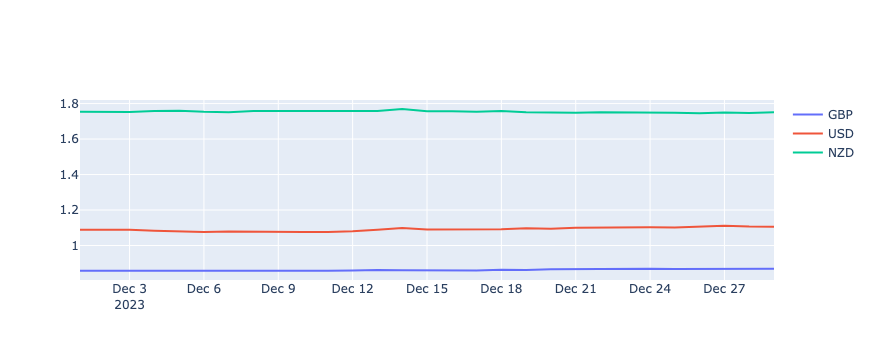

In [59]:
timestamp_after = datetime(2023,12,1)
timestamp_before = datetime(2023,12,30)
base_currency = 'EUR'

fig = go.Figure()
for quote_currency in quote_currencies:
    currency_data = database_connection.get_rates_between_timestamps_as_series(base_currency, quote_currency, timestamp_after, timestamp_before)
    df = pd.DataFrame(currency_data, columns = ['timestamp', 'rate']).sort_values(by = 'timestamp')
    fig.add_trace(go.Scatter(x = df['timestamp'], y = df['rate'], name = quote_currency))
fig.show()

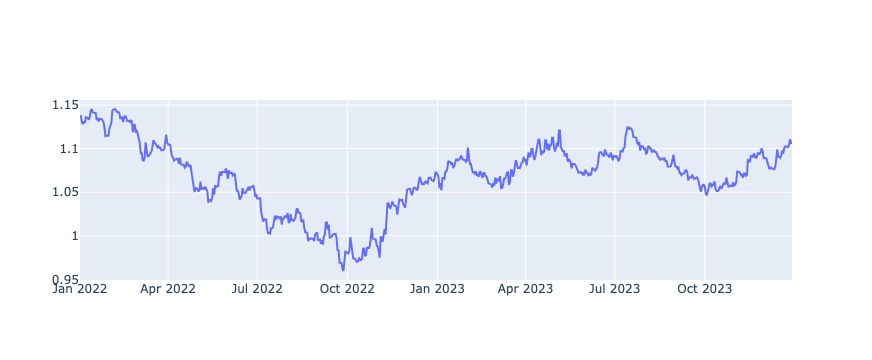